## Hotels Booking 
Focusing on hotel booking data, this project involves investigating customer booking and
cancellation trends. Interns will apply EDA to pinpoint key influences such as seasonality, lead time, and customer preferences. The insights gathered will aid in understanding consumer behavior, assisting hoteliers in optimizing marketing strategies, pricing models, and service offerings to improve occupancy rates and enhance guest experiences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read the datasets into pandas DataFrame objects
hotel_booking= pd.read_csv('hotel_booking.csv')

In [3]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hotel_booking.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
hotel_booking[hotel_booking['company'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [7]:
hotel_booking.iloc[:,]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [8]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel_booking['country'].isnull().sum()

488

In [10]:
hotel_booking.loc[1:50,('booking_changes','meal','country')]

,booking_changes,meal,country
1,4,BB,PRT
2,0,BB,GBR
3,0,BB,GBR
4,0,BB,GBR
5,0,BB,GBR
6,0,BB,PRT
7,0,FB,PRT
8,0,BB,PRT
9,0,HB,PRT
10,0,BB,PRT


In [11]:
hotel_booking['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [13]:
hotel_booking['reserved_room_type'].value_counts()

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

### Handling missing values

In [14]:
hotel_booking = hotel_booking.dropna()

In [15]:
# Verify no missing value
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [16]:
hotel_booking.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Visualization:

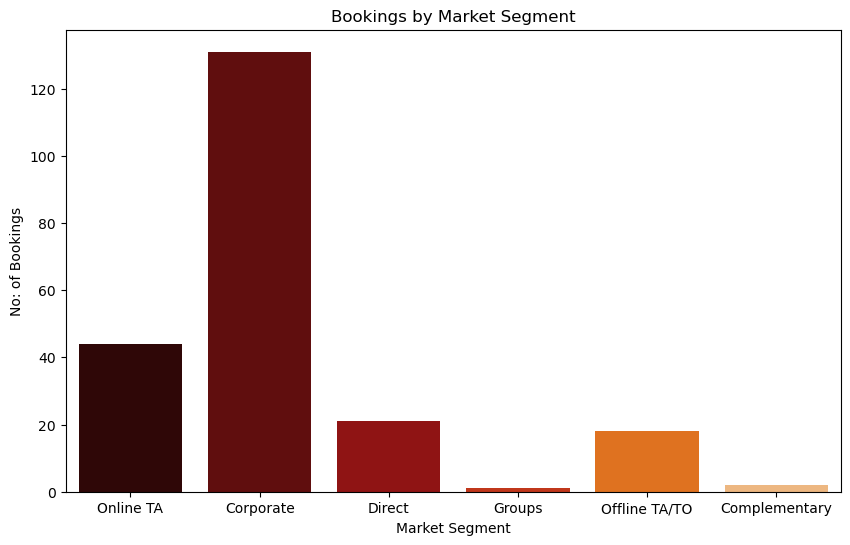

In [17]:
# Booking By Market Segment
plt.figure(figsize = (10,6))
sns.countplot(data = hotel_booking, x = 'market_segment', palette = 'gist_heat' )
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('No: of Bookings')
plt.show()

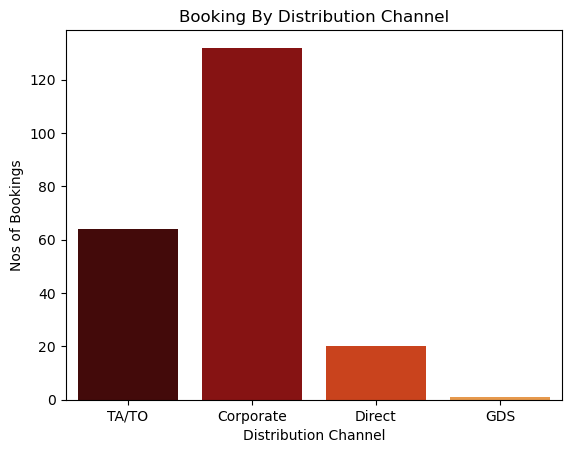

In [18]:
# Booking by Distribution Channel
sns.countplot(data=hotel_booking, x='distribution_channel', palette='gist_heat')
plt.title('Booking By Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Nos of Bookings')
plt.show()

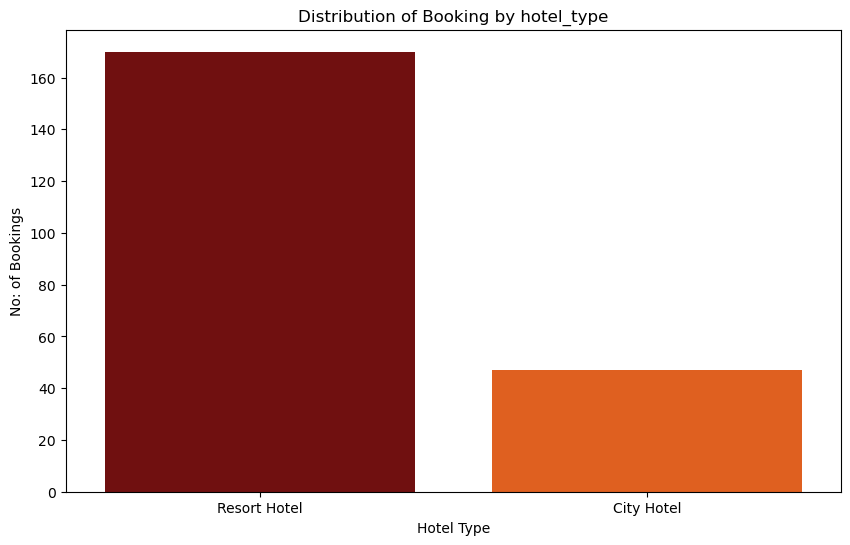

In [19]:
# Distribution of Booking by hotel_type

plt.figure(figsize = (10,6))
sns.countplot(data = hotel_booking, x = 'hotel', palette = 'gist_heat' )
plt.title('Distribution of Booking by hotel_type')
plt.xlabel('Hotel Type')
plt.ylabel('No: of Bookings')
plt.show()

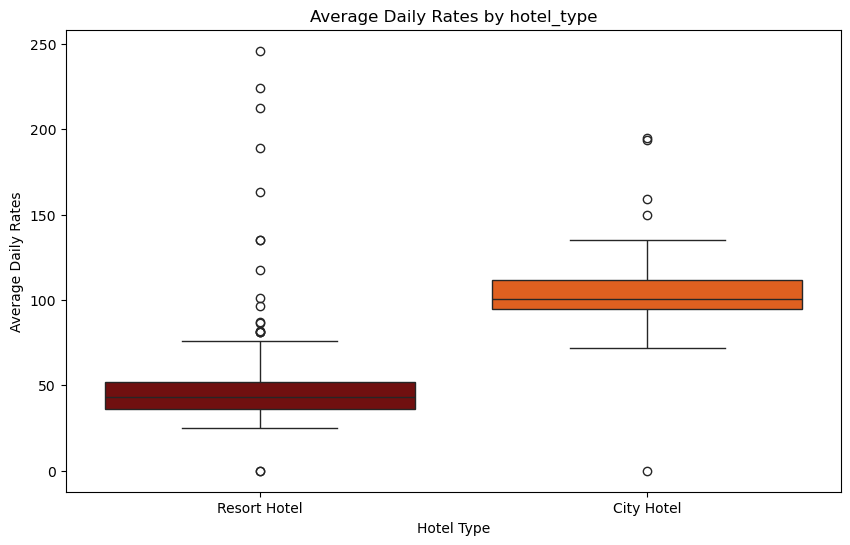

In [20]:
# Average Daily Rates by Hotel Type
plt.figure(figsize = (10,6))
sns.boxplot(data = hotel_booking, x = 'hotel', y = 'adr', palette = 'gist_heat' )
plt.title('Average Daily Rates by hotel_type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rates')
plt.show()

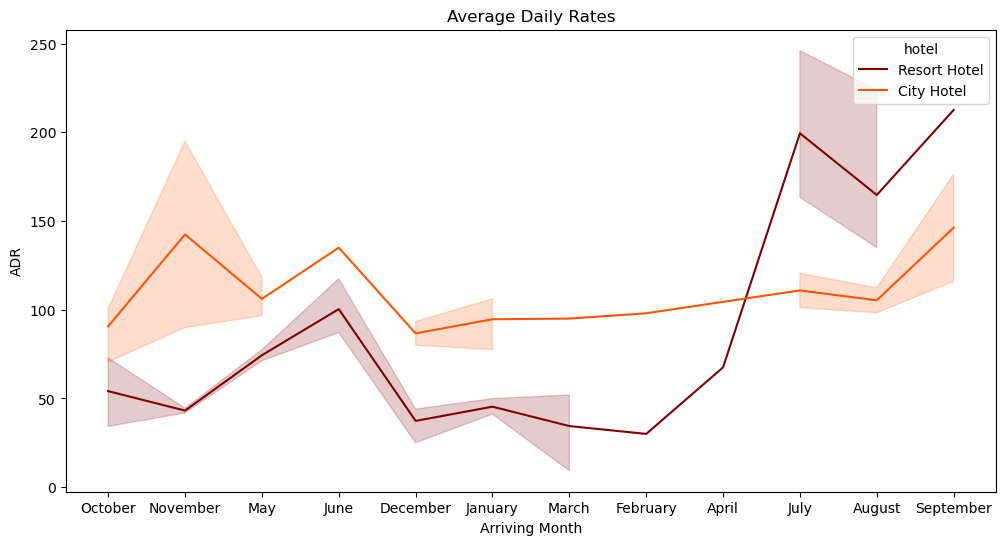

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hotel_booking, palette='gist_heat')
plt.title('Average Daily Rates')
plt.xlabel('Arriving Month')
plt.ylabel('ADR')
plt.show()

**`For City Hotel, ADR is more expensive during July, August & September and for Resort Hotel, ADR is slightly more during March, April & May.`**

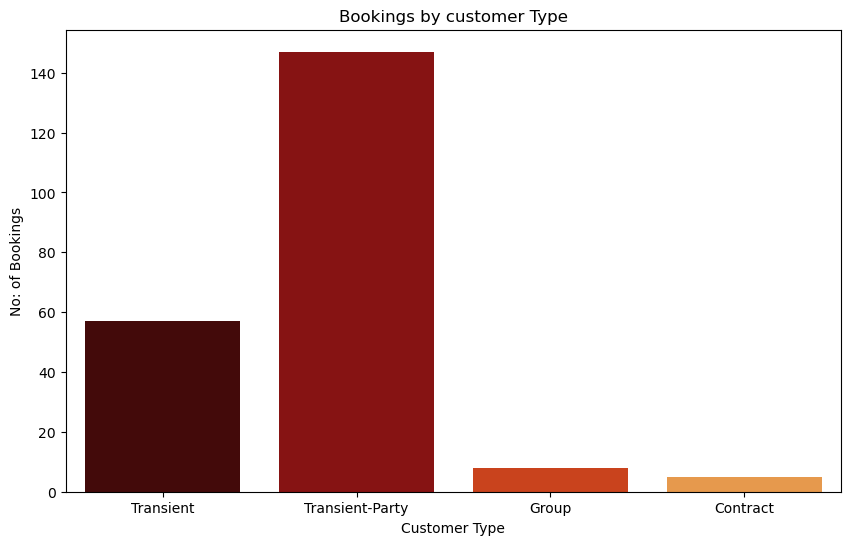

In [22]:
# Booking By Customer type
plt.figure(figsize = (10,6))
sns.countplot(data = hotel_booking, x = 'customer_type',  palette = 'gist_heat' )
plt.title('Bookings by customer Type')
plt.xlabel('Customer Type')
plt.ylabel('No: of Bookings')
plt.show()

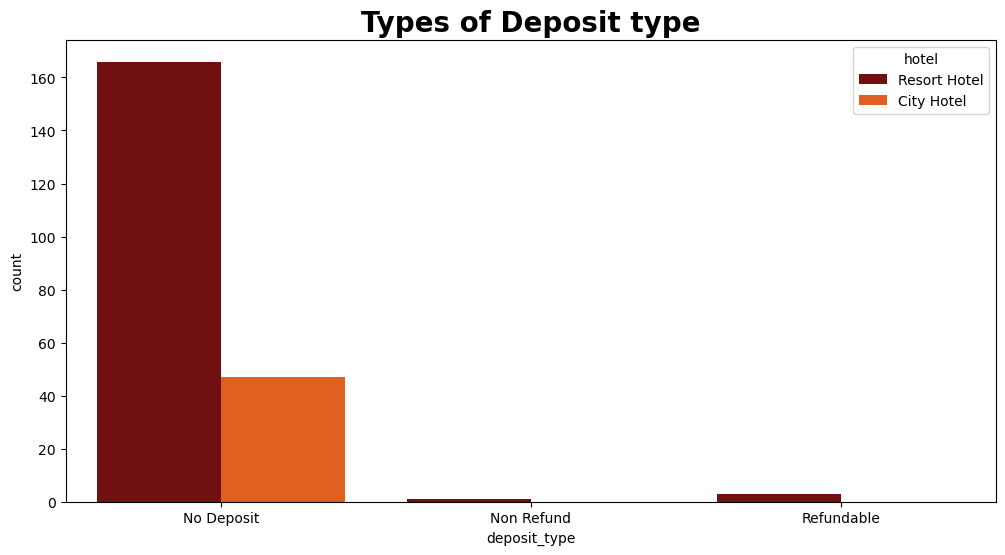

In [23]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel_booking, x = 'deposit_type',hue='hotel', palette='gist_heat')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

**`There was no deposit for Resort hotel where as City Hotels had some deposits. No deposit may lead to cancel the bookings.`**

<function matplotlib.pyplot.show(close=None, block=None)>

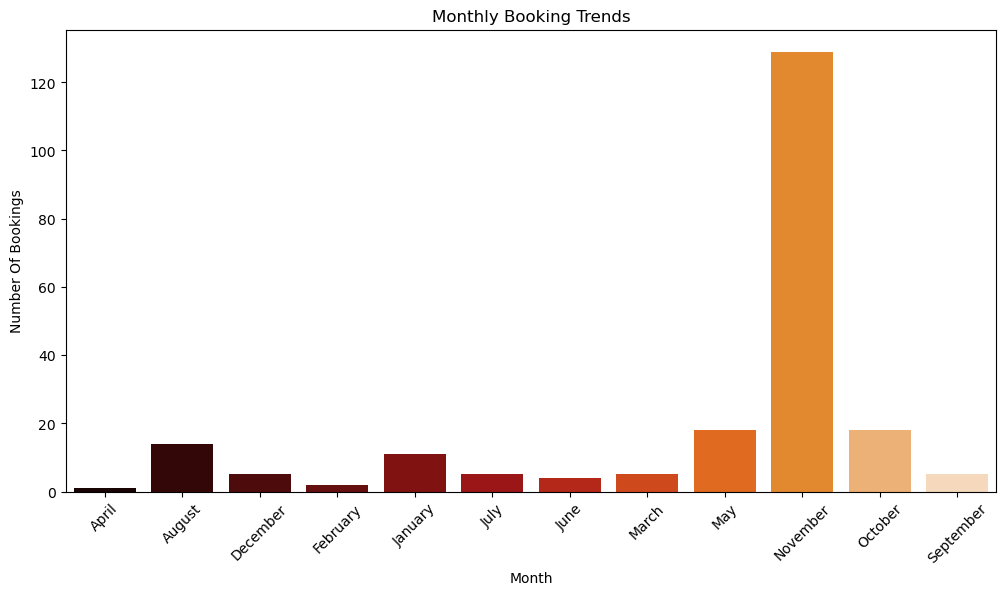

In [24]:
# Monthly Booking Trends
pd.Categorical(hotel_booking['arrival_date_month'],
              categories=['January','Februrary', 'March',
                          'April','May','June','July','August',
                          'September','October','November','December'],
              ordered = True)
monthly_bookings = hotel_booking['arrival_date_month'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_bookings.index,y=monthly_bookings.values,palette='gist_heat')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number Of Bookings')
plt.xticks(rotation = 45)
plt.show

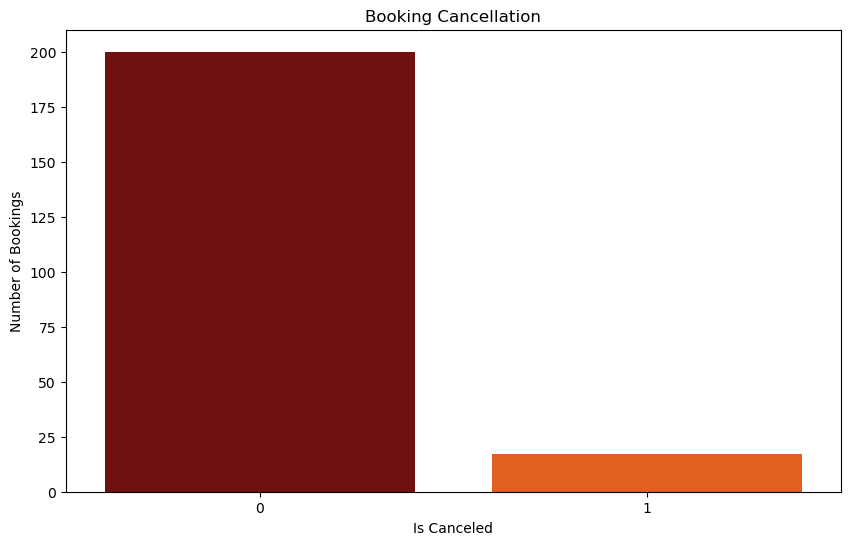

In [25]:
# Booking Cancellation

plt.figure(figsize = (10,6))
sns.countplot(data = hotel_booking, x='is_canceled',  palette = 'gist_heat' )
plt.title('Booking Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Number of Bookings')
plt.show()

Text(0, 0.5, 'Lead Time')

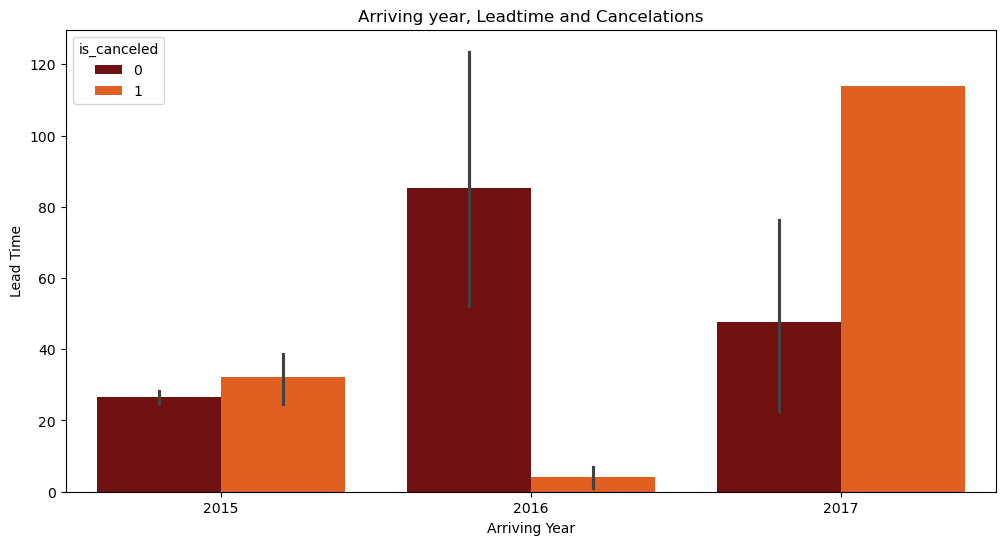

In [26]:
# Lead Time Distribution
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= hotel_booking, palette='gist_heat')
plt.title('Arriving year, Leadtime and Cancelations')
plt.xlabel('Arriving Year')
plt.ylabel('Lead Time')

**`For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.`**

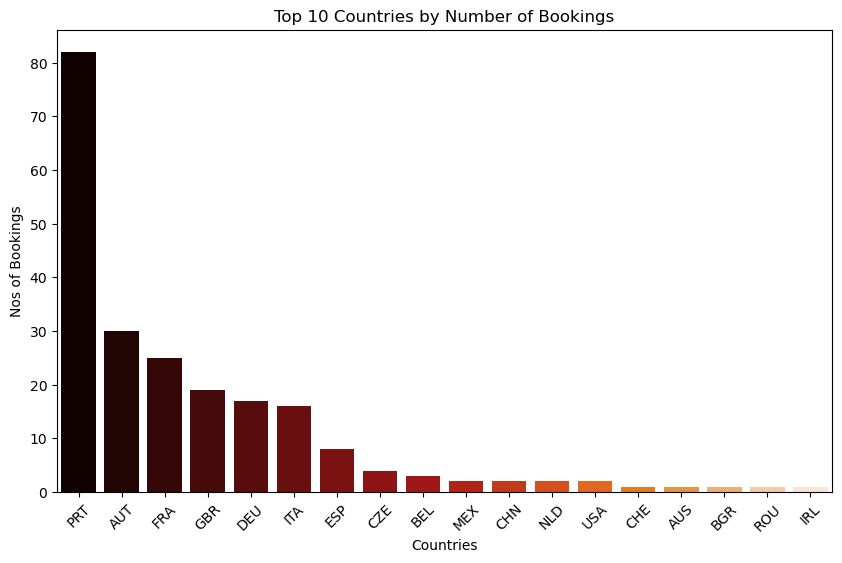

In [27]:
# Booking by Country
top_countries = hotel_booking['country'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette= 'gist_heat')
plt.title("Top 10 Countries by Number of Bookings")
plt.xlabel('Countries')
plt.ylabel('Nos of Bookings')
plt.xticks(rotation=45)
plt.show()

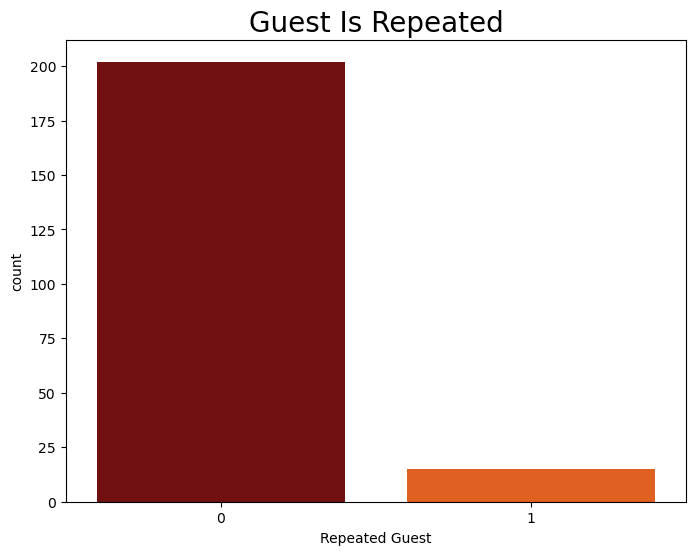

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data = hotel_booking ,x='is_repeated_guest', palette = 'gist_heat')
plt.title('Guest Is Repeated', fontsize=20)
plt.xlabel('Repeated Guest')
plt.show()

 **`Need to work on customer services to target the repeated guest since they booked before`**

## Summary
* Majority of the hotels booked are Resort hotel. Definitely need to spend the most targeting fund on those hotel.
* We also realise that the high rate of cancellations can be due high no deposit policies.
* We should also target months between May to Aug. Those are peak months due to the summer period.
* Majority of the guests are from Portugal. We should spend a significant amount of our budget on those area.
* Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

## Strategies to Counter High Cancellations at the Hotel
* Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
* Encourage Direct bookings by offering special discounts
* Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.